In [66]:
#Branch_MV
import requests
import pandas as pd
import numpy as np
import datetime
import os
import zipfile

In [67]:
#List of countries and regions are here: https://unstats.un.org/unsd/methodology/m49/overview/ but website using
#javascript and not providing link for csv file directly
#Workaround:
#Using a github page to download a csv file
url = "https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv"
filename = "countries.csv"

response = requests.get(url)

if response.status_code == 200:
    with open(filename, "wb") as file:
        file.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print("Failed to download the CSV file.")

CSV file downloaded successfully.


In [68]:
df_countries=pd.read_csv("countries.csv")

In [69]:
#To find a file of your interest: https://data.worldbank.org/indicator
#Clicking on a subset allows to get address to download csv-file

#These are addresses to obtain the data for GDP per capita, life expectancy and literacy rate
url_list=["https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.PP.CD?downloadformat=csv", \
          "https://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=csv",\
            "https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.ZS?downloadformat=csv"]

In [70]:
#Also, giving names for the data to be obtained
data_list=["gdp_per_capita", "life_expectancy", "literacy"]

In [71]:
#First, making folder to download the data from web, names based on data_list
for d in data_list:
    if not os.path.exists(d):
        os.makedirs(d)
    if not os.path.exists(d+"_unpacked"):
        os.makedirs(d+"_unpacked")

In [72]:
#Here one by one, I dowload the data and put into a right folder
for d, u in zip(data_list, url_list):
    response = requests.get(u)
    if response.status_code == 200:
        with open(d+"/"+d+".zip", "wb") as file:
            file.write(response.content)
        print("Zip file downloaded successfully!")
    else:
        print("Failed to retrieve the zip file.")

Zip file downloaded successfully!
Zip file downloaded successfully!
Zip file downloaded successfully!


In [73]:
#Unpacking the data as well
for d in data_list:
    zip_file_path=d+"/"+d+".zip"
    destination_folder=d+"_unpacked"
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print("Extraction completed!")


Extraction completed!
Extraction completed!
Extraction completed!


In [74]:
#To remove excess rows in the csv file, an additional method:
def copy_file(source_file, destination_file):
    with open(source_file, 'r') as source:
        with open(destination_file, 'w') as destination:
            counter=0
            for line in source:
                if(counter>3):
                    destination.write(line)
                counter=counter+1

In [75]:
#Removing extra rows from the csv file:
for d in data_list:
    file_list=os.listdir(d+"_unpacked")
    file_list.sort()
    source_file=d+"_unpacked/"+file_list[0]
    destination_file=d+".csv"
    copy_file(source_file, destination_file)

In [76]:
#Using pandas, going to create the dataframe list:
df_list=[]
for d in data_list:
    temp_df=pd.read_csv(d+".csv")
    df_list.append(temp_df)

In [77]:
#The last column is empty, must be removed
df_list[0].head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN,NaN


In [78]:
#Running the deletion
for n in range(len(df_list)):
    df_list[n]=df_list[n][df_list[n].columns[:-1]]

In [79]:
#Checking
df_list[0].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,36932.184164,36846.848285,37343.912963,37583.840323,38865.188195,41679.238190,42501.641554,34971.009913,42698.359872,NaN
1,Africa Eastern and Southern,AFE,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3333.520911,3470.550675,3498.125396,3591.099809,3635.564622,3724.868177,3777.972368,3621.058106,3839.470058,NaN
2,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN
3,Africa Western and Central,AFW,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3950.948889,4143.177054,4075.994459,3998.951876,4045.303263,4160.540965,4264.731035,4174.504565,4409.450961,NaN
4,Angola,AGO,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7643.921944,8123.048065,7274.090475,7027.146634,7216.061373,7042.923829,6881.076241,6362.636076,6491.125578,NaN


In [80]:
#Here I extract regions and sub-region from countries file and renaming a column
df_countries_small=df_countries[["name","region","sub-region"]]
df_countries_small = df_countries_small.rename(columns={'name': 'Country Name'})

In [81]:
#Conducting merge on country names
#For gdp per capita
df_gdppcap=df_countries_small.merge(df_list[0], on='Country Name')
#For life expectancy
df_lifeexp=df_countries_small.merge(df_list[1], on='Country Name')
#For literacy
df_literacy=df_countries_small.merge(df_list[2], on='Country Name')

##These are the dataframes one can work now!



In [82]:
#%pip install seaborn
#For doing graphics work:
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
#Here I want to extract only country and values for each year
#Extract years from column names
years=list(df_gdppcap.columns)[6:]
#A trick to add 'Country name' as a wanted column
Country=['Country Name']
#Extraction itself
df_gdppcap_country=df_gdppcap[Country+years]

In [84]:
#Checking progress
df_gdppcap_country.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2062.059176,2110.829568,2128.125938,2023.834656,2096.093111,2109.929296,2167.704111,2076.138380,1665.805842,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10570.966045,11259.303681,11658.894897,12078.799334,12770.987862,13498.196119,14407.460749,14035.354780,15814.411571,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13104.737104,13058.124574,12071.814181,11685.451418,11809.483033,12006.010238,12118.004500,11438.691156,12128.274991,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
#Also making a dataframe for sub-regions and taking average for each year
df_gdppcap_subregion=df_gdppcap.groupby(['sub-region'])[years].mean().reset_index()


In [86]:
#Such process would necessary for lineplot, melting
df_gdppcap_subregion.melt(id_vars=['sub-region'])

,sub-region,variable,value
0,Australia and New Zealand,1960,NaN
1,Central Asia,1960,NaN
2,Eastern Asia,1960,NaN
3,Eastern Europe,1960,NaN
4,Latin America and the Caribbean,1960,NaN
...,...,...,...
1066,Southern Asia,2022,NaN
1067,Southern Europe,2022,NaN
1068,Sub-Saharan Africa,2022,NaN
1069,Western Asia,2022,NaN


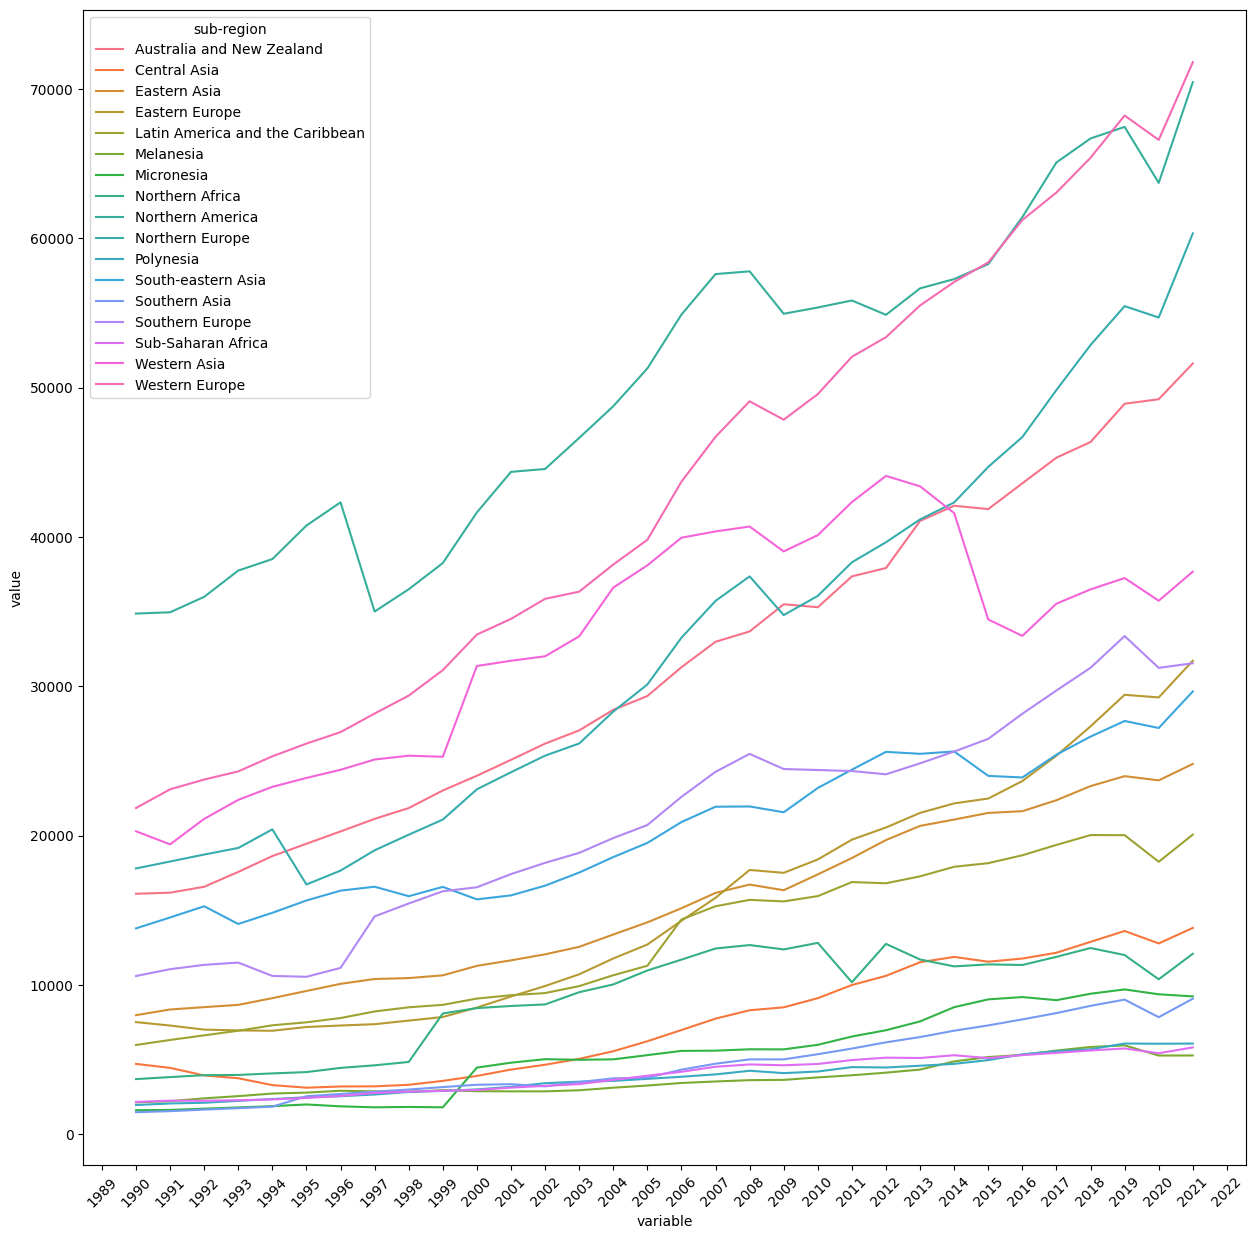

In [87]:
#The dataframe has to be melted
plt.figure(figsize=(15, 15))
sns.lineplot(data=df_gdppcap_subregion.melt(id_vars=['sub-region']), 
             x='variable', y='value', hue='sub-region')
plt.xticks(rotation=45)

#No extra text as output, thus 'None' needed
None
